<a href="https://colab.research.google.com/github/Behnaz81/MachineLearningDaily/blob/main/day04_kfold_validation/MachineLearning4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading and Scaling

In [56]:
df = load_breast_cancer()
X = pd.DataFrame(data=df.data, columns=df.feature_names)
y = pd.DataFrame(data=df.target, columns=['target'])

In [57]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

## Spliting Data into 10 Folds

Here we are using StratifiedKFold to split data into 10 folds. It is a enhanced version of K-Fold Cross Validation. Key difference is that it uses stratification which allows original distribution of each class to be maintained across each fold.

In [58]:
skf = StratifiedKFold(n_splits=10)

## Logistic Regression

In [74]:
lgr = LogisticRegression()

In [75]:
accs = []

In [76]:
acc = cross_val_score(lgr, X, y, cv=skf)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [77]:
acc_mean_lgr = acc.mean()
accs.append(acc_mean_lgr)

In [78]:
print(f"Logistic Regression Model: {round(acc_mean_lgr*100, 2)} ± {round(np.std(acc)*100, 2)}")

Logistic Regression Model: 98.07 ± 1.46


## KNN

In [79]:
knn = KNeighborsClassifier()

In [80]:
acc = cross_val_score(knn, X, y, cv=skf)

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

In [81]:
acc_mean_knn = acc.mean()
accs.append(acc_mean_knn)

In [82]:
print(f"KNN Model: {round(acc_mean_knn*100, 2)} ± {round(np.std(acc)*100, 2)}")

KNN Model: 96.66 ± 1.99


## Decision Tree

In [83]:
dtree = DecisionTreeClassifier()

In [84]:
acc = cross_val_score(dtree, X, y, cv=skf)

In [85]:
acc_mean_dtree = acc.mean()
accs.append(acc_mean_dtree)

In [86]:
print(f"Decision Tree Model: {round(acc_mean_dtree*100, 2)} ± {round(np.std(acc)*100, 2)}")

Decision Tree Model: 90.16 ± 3.34


## Conclusion

As seen here logistic regression model worked the best on this dataset. It's because data are linearly separable.

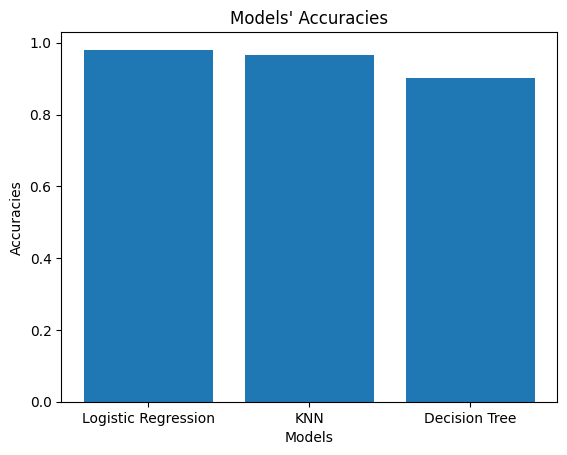

In [72]:
plt.bar(["Logistic Regression", "KNN", "Decision Tree"], accs)
plt.title("Models' Accuracies")
plt.xlabel('Models')
plt.ylabel('Accuracies')
plt.show()

Because spliting is random in train_test_split method we can't assure that the results are reliable. In this project we tried to do the spliting distributed like the original dataset and also we used cross validation score which is a much better method to evaluate the models.

Here as we can see the mean accuracy was good for the logistic regression and also it was more stable because the standard deviation was less than other models. Also decision tree was overfitted and knn was affected by noises.